欢迎来到线性回归项目。

若项目中的题目有困难没完成也没关系，我们鼓励您带着问题提交项目，评审会给予您诸多帮助。

其中证明题可以提交 pdf 格式，手写后扫描或使用公式编辑器（latex，mathtype）均可行。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [4]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何python库，包括NumPy，来完成作业

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [7]:
# TODO 返回矩阵的行数和列数
def shape(M):
    rows = len(M)
    cols = len(M[0])
    return rows, cols

In [2]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [8]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for row in M:
        for i, c in enumerate(row):
            row[i] = round(c, decPts)

In [4]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.061s

OK


## 1.4 计算矩阵的转置

In [9]:
# TODO 计算矩阵的转置
def transpose(M):
    rows, cols = shape(M)
    res = [[0] * rows for i in range(cols)]
    for c in range(cols):
        for r in range(rows):
            res[c][r] = M[r][c]

    return res

In [6]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 1.5 计算矩阵乘法 AB

In [10]:
# TODO 计算矩阵乘法 AB，如果无法相乘则返回None
def matxMultiply(A, B):
    rows_a, cols_a = shape(A)
    rows_b, cols_b = shape(B)
    
    if cols_a != rows_b or rows_a == 0 or cols_a == 0:
        return None
    
    res = [[0] * cols_b for j in range(rows_a)]
    for r_a in range(rows_a):
        for c_b in range(cols_b):
            total = 0
            for r_b in range(rows_b):
                total += A[r_a][r_b] * B[r_b][c_b]
            res[r_a][c_b] = total
    
    return res

In [8]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.053s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    return [AA + bb for AA, bb in zip(A, b)]

In [10]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [12]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [13]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [14]:
# TODO r1 <--- r1 * scale， scale!=0
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
        
    M[r] = [M[r][i] * scale for i in range(len(M[r]))]

In [15]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [16]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [M[r1][i] + M[r2][i] * scale for i in range(len(M[r1]))]

In [17]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 提示：

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None （请在问题2.4中证明该命题）
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

### 注：
我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

In [18]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    matxRound(A, decPts)
    matxRound(b, decPts)
    
    rows, cols = shape(A)
    if rows != len(b):
        return None

    Ab = augmentMatrix(A, b)
    for c in range(cols):
        maxValue = abs(Ab[c][c])
        maxIndex = c
        for i in range(c, rows):
            if abs(Ab[i][c]) > maxValue:
                maxValue = abs(Ab[i][c])
                maxIndex = i

        if abs(maxValue - 0) < epsilon :
            return None

        swapRows(Ab, maxIndex, c)
        scaleRow(Ab, c, 1 / Ab[c][c])

        for j in range(rows):
            if j != c:
                addScaledRow(Ab, j, c, -Ab[j][c])
    
    return [[Ab[r][cols]] for r in range(rows)]

In [19]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 0.039s

OK


## 2.4 证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

---

# 3 线性回归: 

## 3.1 计算损失函数相对于参数的导数 (两个3.1 选做其一)

我们定义损失函数 $E$ ：
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
定义向量$Y$, 矩阵$X$ 和向量$h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

证明：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

TODO 证明：

## 3.1 计算损失函数相对于参数的导数（两个3.1 选做其一）

我们定义损失函数 $E$ ：
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
定义向量$Y$, 矩阵$X$ 和向量$h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

证明：

$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$ 

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}  = \frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO 请使用 latex （请参照题目的 latex 写法学习）

TODO 证明：

## 3.2  线性回归

### 求解方程 $X^TXh = X^TY $, 计算线性回归的最佳参数 h 
*如果你想更深入地了解Normal Equation是如何做线性回归的，可以看看MIT的线性代数公开课，相关内容在[投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html)。*

In [20]:
# TODO 实现线性回归
'''
参数：(x,y) 二元组列表
返回：m，b
'''
def linearRegression(points):
    sum_x_2 = 0
    sum_x = 0
    sum_xy = 0
    sum_y = 0
    for point in points:
        sum_x_2 += point[0] ** 2
        sum_x += point[0]
        sum_xy += point[0] * point[1]
        sum_y += point[1]

    A = [[sum_x_2, sum_x], [sum_x, len(points)]]
    b = [[sum_xy], [sum_y]]
    result =  gj_Solve(A, b)
    return result[0][0], result[1][0]

## 3.3 测试你的线性回归实现

(1.9963359117911794, 1.1509613663366047)


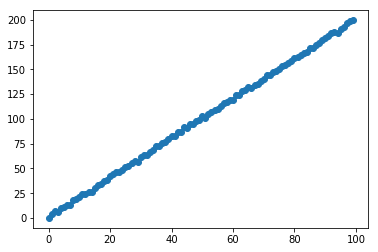

In [21]:
# TODO 构造线性函数
def linearFunction(x):
    y = 2.0 * x + 1.0
    return y

# TODO 构造 100 个线性函数上的点，加上适当的高斯噪音
import random

def pointsGenerator(num = 100, sigma = 1):
    points = []
    for i in range(num):
        x = i
        y = linearFunction(x) + random.gauss(0, sigma)
        points.append([x, y])
    return points

#TODO 对这100个点进行线性回归，将线性回归得到的函数和原线性函数比较
print linearRegression(pointsGenerator(100, 1))

points = pointsGenerator(num = 100, sigma = 1)
import matplotlib.pyplot as plt
x, y = transpose(points)
plt.scatter(x, y)
plt.show()